Try three different bootstrapping methods for estimating the
error bar on a statistic for a synthetic data that is IID by construction. For your
data set, draw a hundred samples from a normal distribution with zero mean and
unit variance. On this dataset, estimate the standard deviation (ground truth
value of which is unity), and its error bar. In the first method for error bar
estimation, do bootstrapping by selecting random halves of the data (e.g., 1000
random splits). In the second method, do bootstrapping by resampling (e.g.,
1000 times) with replacement from the full dataset. In the third method, apply
the Jackknife estimate. Compare the obtained error bar estimates.

In [205]:
import numpy as np
import matplotlib.pyplot as plt
import random

# 1) Generate the data
For your
data set, draw a hundred samples from a normal distribution with zero mean and
unit variance.

## Own Gaussian implementation

In [148]:
N = 1000
mu  = 0
sigma = 1
xrange = [-5,5]
x = np.linspace(xrange[0]*sigma,xrange[1]*sigma,N) # draw from a uniform distribution

def gaussian(x, mu, sigma):
    """
    Parameters
    ----------
    x: an array of points at which to evaluate the Gaussian function
    mu : mean
    sigma : standard deviation

    Returns
    -------
    p : probability
    """
    p = np.zeros(N)
    p = (1/np.sqrt(2*np.pi*sigma**2)) * np.e**(-(1/2)*(x-mu)**2 / sigma**2)
    return p

In [145]:
p = gaussian(x, 0,1)

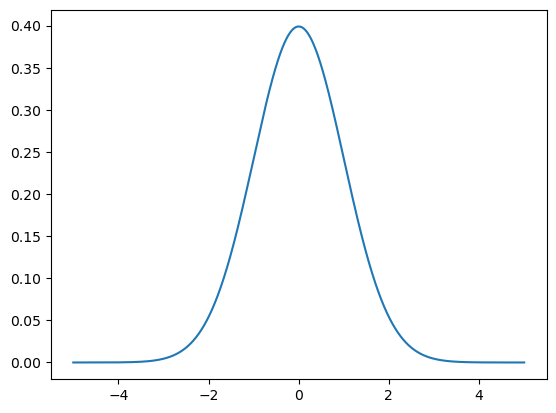

In [146]:
plt.plot(x,p)
plt.show()

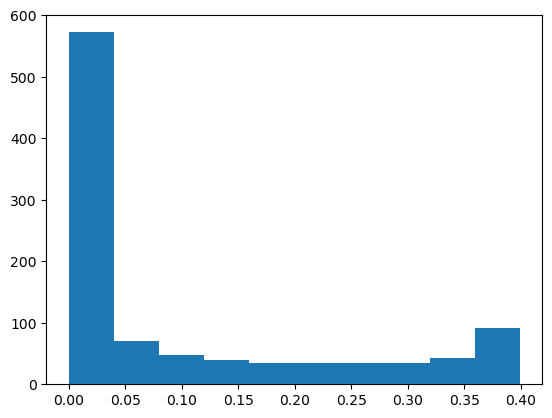

In [147]:
plt.hist(p, bins=10)
plt.show()

In [152]:
n = gaussian(0,0,1)

In [153]:
n

0.3989422804014327

## NumPy libraries

In [328]:
# data = np.random.normal(175,15,1000)
rng = np.random.default_rng(seed=64)

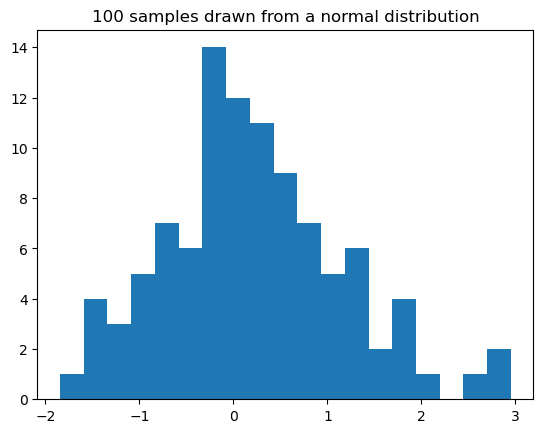

In [207]:
data = rng.normal(loc=0, scale=1, size=100)

bins = np.linspace(data.min(), data.max(), numbins)
counts, _ = np.histogram(data, bins=bins, density=False)

plt.hist(data, bins=bins)
plt.title('100 samples drawn from a normal distribution')
plt.show()

# 2) Estimate the standard deviation and its error bar
On this dataset, estimate the standard deviation (ground truth
value of which is unity), and its error bar.
## a) In the first method for error bar estimation, do bootstrapping by selecting random halves of the data (e.g., 1000 random splits).

### Take random subsets

In [296]:
subsetSize = int(len(data)/2)
permutations = 1000

def bootstrap_random_halves(data, subsetSize, permutations):
    '''
    Splits the data  into random halves (not preserving continuity, assuming IID).
    Input: data, subsetSize = size of the random subset, permutations = number of samples to draw.
    Output: bootstrapped subsets (random halves).
    '''
    subsets = np.zeros((permutations, subsetSize))
    for run in range(permutations):
        # randomly select half the data points (k = length of subset) and store in a matrix where the rows are subsets and the columns are runs
        subsets[run] = random.choices(data, k=subsetSize)
    return subsets

subsets1 = bootstrap_random_halves(data, subsetSize, permutations)

### Bin the data

In [293]:
def bin_samples(bootstrapped_subsets, bins):
    '''
    Takes an array of n bootstrapped samples of m elements and bins using the np histogram function.
    Input: an mxn array of samples, a list of b bin edges
    Output: a bxn array of bins x counts
    '''
    # Define the size of the output array
    numbins=int(bins.size)-1
    repetitions = bootstrapped_subsets.shape[0]
    binned_samples = np.zeros((repetitions, numbins))
    
    # Find dist = bin the data according to our predefined bins and return counts per bins
    for run in range(repetitions):
        subset = bootstrapped_subsets[run,:]
        binned_samples[run,:], _ = np.histogram(subset, bins=bins, density=False)
    
    return binned_samples

In [303]:
binned_samples1 = bin_samples(subsets1, bins)

### Calculate the mean value for each bin, the estimated standard deviation overall, and the error bars (std) for each bin.

In [306]:
# Find std for each bootstrapped subset
subset_stds1 = np.zeros(permutations)
for subset in range(permutations):
    subset_stds1[subset] = np.std(subsets1[subset])

total_std1 = np.mean(subset_stds1)

means1 = np.mean(binned_samples1, axis=0)
stds1 = np.std(binned_samples1, axis=0)

### Plot the average histogram with error bars

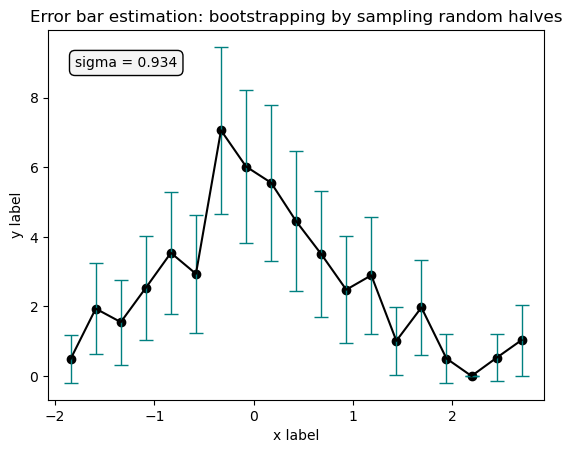

In [315]:
plt.scatter(bins[:-1], means1, color='k')
plt.errorbar(bins[:-1],means1, color='k', yerr=stds1, elinewidth=1, ecolor='teal', capsize=5) 
plt.title('Error bar estimation: bootstrapping by sampling random halves')
plt.xlabel('x label')
plt.ylabel('y label')
plt.text(-1.8,9.2,f'sigma = {total_std1:.3f}', verticalalignment='top',bbox=dict(facecolor='whitesmoke', edgecolor='k', boxstyle='round,pad=.4'))

plt.show()

## b) In the second method, do bootstrapping by resampling (e.g., 1000 times) with replacement from the full dataset.

### Take random subsets

In [324]:
subsetSize = int(data.size/2)
permutations = 1000

def bootstrap_with_replacement(data, subsetSize, permutations):
    '''
    Takes a random subset of the data by drawing each element individually with replacement.
    Input: data, subsetSize = size of the random subset, permutations = number of samples to draw.
    Output: bootstrapped subsets (with replacement)
    '''
    subsets = np.zeros((permutations, subsetSize)) # store sample for each permutation; may delete later
    for run in range(permutations):
        for element in range(subsetSize):
            subsets[run, element] = np.random.choice(data)
    return subsets

subsets2 = bootstrap_with_replacement(data, subsetSize, permutations)

### Bin the data

In [325]:
binned_samples2 = bin_samples(subsets2, bins)

### Calculate the mean value for each bin, the estimated standard deviation overall, and the error bars (std) for each bin.

In [326]:
# Find std for each bootstrapped subset
subset_stds2 = np.zeros(permutations)
for subset in range(permutations):
    subset_stds2[subset] = np.std(subsets2[subset])

total_std2 = np.mean(subset_stds2)

means2 = np.mean(binned_samples2, axis=0)
stds2 = np.std(binned_samples2, axis=0)

### Plot the average histogram with error bars

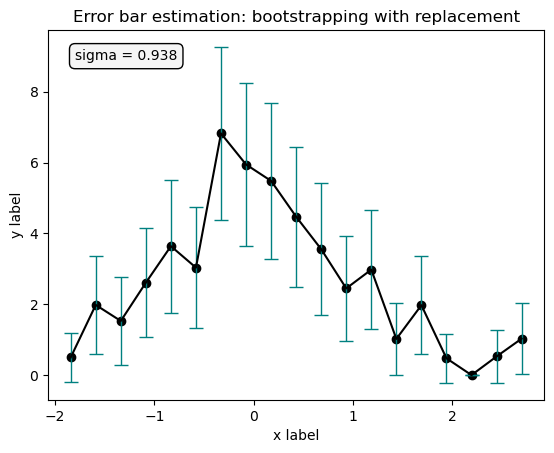

In [327]:
plt.scatter(bins[:-1], means2, color='k')
plt.errorbar(bins[:-1],means2, color='k', yerr=stds2, elinewidth=1, ecolor='teal', capsize=5) 
plt.title('Error bar estimation: bootstrapping with replacement')
plt.xlabel('x label')
plt.ylabel('y label')
plt.text(-1.8,9.2,f'sigma = {total_std2:.3f}', verticalalignment='top',bbox=dict(facecolor='whitesmoke', edgecolor='k', boxstyle='round,pad=.4'))

plt.show()

## In the third method, apply the Jackknife estimate. Compare the obtained error bar estimates.

Jackknife: leave each point out in turn

### Take random subsets

In [344]:
somedata = np.array([1,2,3,4])

newdata = np.delete(somedata, 0)

print(somedata)

newdata

[1 2 3 4]


array([2, 3, 4])

In [350]:
subsetSize = data.size-1
permutations = 1000

def jackknife(data, subsetSize, permutations):
    '''
    Takes a random subset of the data by systematically excluding each element.
    '''
    subsets = np.zeros((permutations, subsetSize))
    for element in range(subsetSize):
        subsets[element] = np.delete(data, element)
    return subsets

subsets3 = jackknife(data,subsetSize, permutations)
    
print(subsets3.size)

99000


In [324]:
subsetSize = int(data.size/2)
permutations = 1000

def bootstrap_with_replacement(data, subsetSize, permutations):
    '''
    Takes a random subset of the data by drawing each element individually with replacement.
    Input: data, subsetSize = size of the random subset, permutations = number of samples to draw.
    Output: bootstrapped subsets (with replacement)
    '''
    subsets = np.zeros((permutations, subsetSize)) # store sample for each permutation; may delete later
    for run in range(permutations):
        for element in range(subsetSize):
            subsets[run, element] = np.random.choice(data)
    return subsets

subsets2 = bootstrap_with_replacement(data, subsetSize, permutations)

### Bin the data